# PROJECT 1

**Task:**

1 - Using an extract of the MNIST dataset (use script below), find the best features or combination of features to classifiy any digit from the MNIST dataset (extracted) using **<u>only</u>** rule based algorithm (no Machine Learning or Deep Learning approach).

Ex: 

- if 0<mean(image)<400 then digit = "0" else....

2 - Evaluate the accuracy of your rule based algorithm to classify in the right class any digit image from the reduced MNIST dataset extracted (see below).

**Deliverable:**

The deliverable will be a Jupyter Notebook. 

**Deadline:**

This project must be submitted before October, 25.

# Load MNIST Dataset and extract 10 occurences of each digit class

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert labels to integers
y = y.astype(int)

# Output directory to store the new dataset
output_dir = './MNIST_10/'  # Change to your actual output path

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a dictionary to store the images for each class
new_dataset = {}

# Select 10 images per class (0 to 9)
for digit in range(10):
    # Get the indices where the label matches the digit
    digit_indices = np.where(y == digit)[0]
    
    # Select the first 10 images for this class
    selected_indices = digit_indices[:10]
    
    # Store the selected images in the new dataset
    new_dataset[digit] = X.iloc[selected_indices].values  # Extract the image data

    # Save the images as individual files for visualization
    for i, idx in enumerate(selected_indices):
        image = X.iloc[idx].values.reshape(28, 28)
        
        # Create the file path for saving the image
        image_path = os.path.join(output_dir, f'digit_{digit}_img_{i}.png')
        
        # Save the image using matplotlib
        plt.imsave(image_path, image, cmap='gray')

# Example: Checking the shape of the new dataset
for digit, images in new_dataset.items():
    print(f"Digit: {digit}, Number of images: {len(images)}")

print(f"New dataset created with 10 images per class.")

Digit: 0, Number of images: 10
Digit: 1, Number of images: 10
Digit: 2, Number of images: 10
Digit: 3, Number of images: 10
Digit: 4, Number of images: 10
Digit: 5, Number of images: 10
Digit: 6, Number of images: 10
Digit: 7, Number of images: 10
Digit: 8, Number of images: 10
Digit: 9, Number of images: 10
New dataset created with 10 images per class.


# Plot the reduced MNIST dataset extracted 

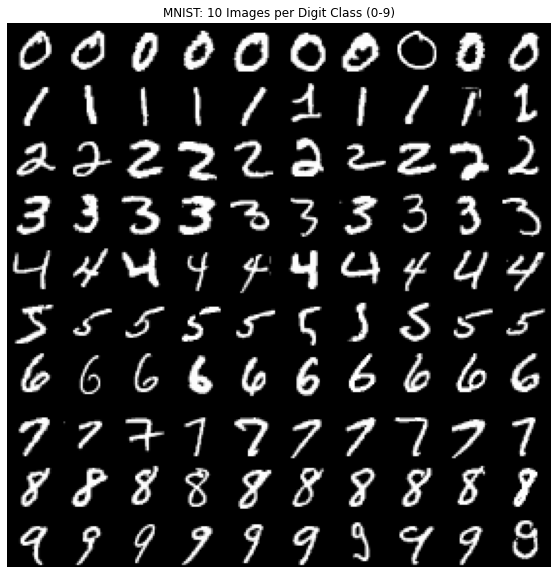

In [2]:
# Create a global image to hold all the rows of images
num_classes = 10
num_images_per_class = 10
image_size = 28

# Create a blank canvas: 10 rows (one per digit), 10 columns (images per digit)
global_image = np.zeros((num_classes * image_size, num_images_per_class * image_size))

# Populate the global image with the selected images
for digit in range(num_classes):
    for i in range(num_images_per_class):
        image = new_dataset[digit][i].reshape(image_size, image_size)
        global_image[digit * image_size:(digit + 1) * image_size, i * image_size:(i + 1) * image_size] = image

# Plot the global image
plt.figure(figsize=(10, 10))
plt.imshow(global_image, cmap='gray')
plt.title('MNIST: 10 Images per Digit Class (0-9)')
plt.axis('off')  # Turn off axis labels
plt.show()